In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
dtafile='C:/Users/huyen/My Drive/UCR_Drive/VARHS/Poverty/outcome_data_August.dta'
income_path='C:/Users/huyen/My Drive/UCR_Drive/VARHS/Poverty/income_household.dta'
df_poor=pd.read_stata(dtafile)
df_income=pd.read_stata(income_path)

df = df_poor.merge(df_income)

In [66]:
df.tail()


,idcom,idhh,age,political,landsize,room,wall1,floor1,roof1,dwelling1,...,hh_agri,hh_nonagri,ind_agri_pe,ind_non_pe,edu1,gender1,marital1,poor1,year1,total
24625,801_9_19,801_9_19_3,57.0,1.0,2.65,60.0,1.0,3.0,5.0,1.0,...,NaN,NaN,NaN,NaN,4.0,1.0,2.0,2.0,10.0,146754.0
24626,801_9_19,801_9_19_3,59.0,0.0,0.85,110.0,2.0,4.0,5.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,12.0,70435.0
24627,801_9_19,801_9_19_3,61.0,1.0,0.85,120.0,2.0,4.0,5.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,14.0,91900.0
24628,801_9_19,801_9_19_3,63.0,0.0,2.35,70.0,2.0,4.0,5.0,1.0,...,1.0,0.0,100.0,0.0,1.0,1.0,2.0,2.0,16.0,139822.0
24629,801_9_19,801_9_19_3,65.0,0.0,2.35,210.0,2.0,3.0,5.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,18.0,152900.0


In [67]:
df.columns

Index(['idcom', 'idhh', 'age', 'political', 'landsize', 'room', 'wall1',
       'floor1', 'roof1', 'dwelling1', 'ind_agri', 'ind_nonagri', 'hh_agri',
       'hh_nonagri', 'ind_agri_pe', 'ind_non_pe', 'edu1', 'gender1',
       'marital1', 'poor1', 'year1', 'total'],
      dtype='object')

In [68]:
missing_value_perc = round(df.isnull().mean().mul(100).sort_values(ascending = False), 2) # missing values
missing_value_perc.to_frame().style.background_gradient(cmap='Greens')

,0
ind_nonagri,56.860000
hh_nonagri,56.860000
ind_non_pe,56.860000
ind_agri,56.860000
ind_agri_pe,56.860000
hh_agri,56.860000
landsize,25.850000
poor1,20.090000
dwelling1,19.050000
room,19.020000


In [69]:
df[df.poor1.isnull()]


,idcom,idhh,age,political,landsize,room,wall1,floor1,roof1,dwelling1,...,hh_agri,hh_nonagri,ind_agri_pe,ind_non_pe,edu1,gender1,marital1,poor1,year1,total
24,105_11_23,105_11_23_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
25,105_11_23,105_11_23_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
27,105_11_23,105_11_23_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN
35,105_11_23,105_11_23_3,46.0,0.0,0.036,50.0,5.0,6.0,7.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,18.0,140310.0
38,105_11_23,105_11_23_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24608,801_9_12,801_9_12_2,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,100.0,1.0,2.0,3.0,NaN,12.0,NaN
24610,801_9_12,801_9_12_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
24611,801_9_12,801_9_12_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN
24621,801_9_19,801_9_19_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN


In [70]:
df.drop(['ind_agri', 'ind_nonagri', 'hh_agri', 'hh_nonagri', 'ind_agri_pe', 'ind_non_pe'], axis=1, inplace=True) 

In [71]:
df.drop_duplicates(subset=['idhh', 'year1'], keep='last', inplace=True)

In [72]:
df.shape[0]

24630

In [73]:
df2=df.dropna()

In [74]:
df2.shape[0]


16871

In [75]:
df2.year1.unique()

array([ 8., 10., 12., 14., 16., 18.], dtype=float32)

In [76]:
df2["poor1"].replace({2.0: 0}, inplace=True)
# df2 = df2[df2['total']>0]

C:\Users\huyen\AppData\Local\Temp\ipykernel_15728\4045053416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["poor1"].replace({2.0: 0}, inplace=True)


In [77]:
count_hh = pd.DataFrame(df2.idhh.value_counts().reset_index())
count_hh_ls = list(count_hh[count_hh['idhh'] == 5]['index'])

In [78]:
df_all=df2

In [79]:
df_all.head()

,idcom,idhh,age,political,landsize,room,wall1,floor1,roof1,dwelling1,edu1,gender1,marital1,poor1,year1,total
0,105_11_15,105_11_15_1,45.0,0.0,0.1776,35.0,5.0,4.0,6.0,1.0,1.0,1.0,2.0,0.0,8.0,27337.0
1,105_11_15,105_11_15_1,47.0,0.0,0.2443,40.0,5.0,3.0,6.0,1.0,1.0,1.0,2.0,0.0,10.0,55550.0
2,105_11_15,105_11_15_1,49.0,0.0,0.2443,50.0,5.0,4.0,6.0,1.0,2.0,1.0,2.0,0.0,12.0,107484.0
3,105_11_15,105_11_15_1,51.0,0.0,0.1594,70.0,5.0,6.0,7.0,1.0,1.0,1.0,2.0,0.0,14.0,154433.0
4,105_11_15,105_11_15_1,53.0,0.0,0.1699,140.0,5.0,6.0,7.0,1.0,2.0,1.0,2.0,0.0,16.0,111810.0


In [80]:
df_all = df_all.sort_values(['idhh', 'year1'],
              ascending = [True, True])
df_all.reset_index(drop=True, inplace=True)

In [81]:
df_all['next_total']=df_all.groupby('idhh')['total'].shift(-1)
df_all['next_poor']=df_all.groupby('idhh')['poor1'].shift(-1)

In [82]:
df_all.describe()

,age,political,landsize,room,wall1,floor1,roof1,dwelling1,edu1,gender1,marital1,poor1,year1,total,next_total,next_poor
count,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000,1.687100e+04,1.313300e+04,13133.000000
mean,51.333355,0.325707,0.862474,76.151799,3.986012,4.413076,5.257661,1.020390,1.284334,1.175212,2.157489,0.221623,13.073084,8.687694e+04,9.730443e+04,0.209472
std,24.503782,0.468677,1.445341,47.558272,1.488645,1.407850,1.316129,0.197058,0.861859,0.380142,0.440050,0.415331,3.452124,1.853881e+05,2.015304e+05,0.406931
min,14.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,-3.834980e+05,-3.834980e+05,0.000000
25%,41.000000,0.000000,0.170000,48.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,2.000000,0.000000,10.000000,2.980300e+04,3.633400e+04,0.000000
50%,50.000000,0.000000,0.400000,60.000000,5.000000,4.000000,5.000000,1.000000,1.000000,1.000000,2.000000,0.000000,14.000000,5.454000e+04,6.380000e+04,0.000000
75%,59.000000,1.000000,1.045000,90.000000,5.000000,6.000000,6.000000,1.000000,1.000000,1.000000,2.000000,0.000000,16.000000,1.020850e+05,1.150000e+05,0.000000
max,1919.000000,1.000000,83.022202,960.000000,7.000000,7.000000,8.000000,3.000000,7.000000,2.000000,5.000000,1.000000,18.000000,1.815852e+07,1.815852e+07,1.000000


In [83]:
df_all[df_all['age']>100]

,idcom,idhh,age,political,landsize,room,wall1,floor1,roof1,dwelling1,edu1,gender1,marital1,poor1,year1,total,next_total,next_poor
348,105_13_23,105_13_23_16,1909.0,0.0,0.0384,60.0,5.0,6.0,7.0,1.0,1.0,2.0,3.0,0.0,8.0,6700.0,95400.0,0.0
8322,302_15_11,302_15_11_47,1919.0,0.0,1.2000,60.0,2.0,3.0,4.0,1.0,1.0,1.0,2.0,1.0,18.0,26170.0,NaN,NaN
12643,605_19_13,605_19_13_3,107.0,0.0,1.1000,54.0,2.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,8.0,15126.0,9470.0,1.0
12644,605_19_13,605_19_13_3,109.0,0.0,0.3000,60.0,2.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,10.0,9470.0,115610.0,1.0


In [84]:
df_all['age'] = df_all['age'].replace([1909.0],2008-1909)
df_all['age'] = df_all['age'].replace([1919.0],2008-1919)

In [85]:
#df_all=df_all.drop(df_all['age']>100, axis=1, inplace=True)


In [86]:
df_all.dropna(inplace=True)
df_all.reset_index(drop=True, inplace=True)
df_ind=df_all.drop(columns=['idcom', 'idhh', 'year1'])

count    13133.000000
mean        50.434708
std         13.644882
min         14.000000
25%         40.000000
50%         49.000000
75%         58.000000
max        109.000000
Name: age, dtype: float64


<Figure size 648x576 with 0 Axes>

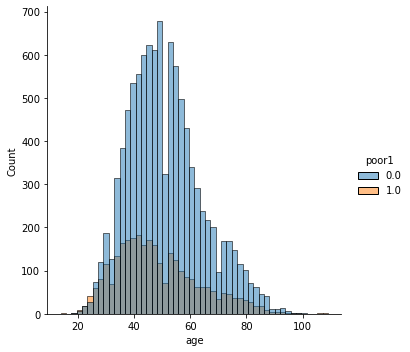

In [87]:
print(df_ind['age'].describe())
plt.figure(figsize=(9,8))
sns.displot(data=df_ind, x='age', hue='poor1', bins=50)

In [88]:
df_ind.columns

Index(['age', 'political', 'landsize', 'room', 'wall1', 'floor1', 'roof1',
       'dwelling1', 'edu1', 'gender1', 'marital1', 'poor1', 'total',
       'next_total', 'next_poor'],
      dtype='object')

In [89]:
col_names = ['political', 'wall1','floor1', 'roof1',
       'dwelling1', 'edu1', 'gender1', 'marital1',
       'poor1', 'next_poor']
for col in col_names:
    df_ind[col] = df_ind[col].astype('category',copy=False)


In [90]:
df_ind['landsize'] = df_ind['landsize']*10000

count     13133.000000
mean       8603.206055
std       14700.058594
min           0.000000
25%        1734.000000
50%        4000.000000
75%       10369.999023
max      830222.000000
Name: landsize, dtype: float64


<Figure size 648x576 with 0 Axes>

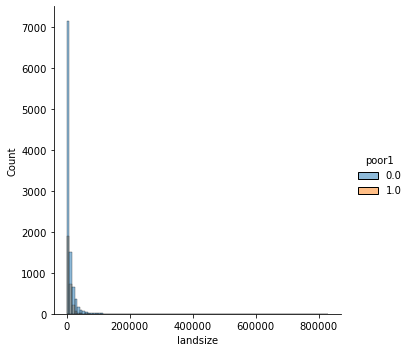

In [91]:
print(df_ind['landsize'].describe())
plt.figure(figsize=(9, 8))
sns.displot(data=df_ind, x='landsize',hue='poor1',bins=100);

In [92]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

xgb_cl = xgb.XGBClassifier()
le = preprocessing.LabelEncoder()

In [93]:
num_features = df_ind.drop(columns=['poor1', 'next_poor']+list(df_ind.select_dtypes(exclude="number").columns))
cat_feat = df_ind[df_ind.select_dtypes(exclude="number").columns]


In [94]:
cat_feat = cat_feat.apply(le.fit_transform)
feats = num_features.merge(cat_feat, left_index=True, right_index=True)

In [95]:
feats.shape


(13133, 15)

In [96]:
feats

,age,landsize,room,total,next_total,political,wall1,floor1,roof1,dwelling1,edu1,gender1,marital1,poor1,next_poor
0,45.0,1776.0,35.0,27337.0,55550.0,0,4,3,5,0,0,0,1,0,0
1,47.0,2443.0,40.0,55550.0,107484.0,0,4,2,5,0,0,0,1,0,0
2,49.0,2443.0,50.0,107484.0,154433.0,0,4,3,5,0,1,0,1,0,0
3,51.0,1594.0,70.0,154433.0,111810.0,0,4,5,6,0,0,0,1,0,0
4,53.0,1699.0,140.0,111810.0,205420.0,0,4,5,6,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,55.0,25000.0,108.0,13695.0,146754.0,0,1,2,4,0,3,0,1,0,0
13129,57.0,26500.0,60.0,146754.0,70435.0,1,0,2,4,0,3,0,1,0,0
13130,59.0,8500.0,110.0,70435.0,91900.0,0,1,3,4,0,0,0,1,0,0
13131,61.0,8500.0,120.0,91900.0,139822.0,1,1,3,4,0,0,0,1,0,0


# Output: next_poor

In [101]:
X = feats.drop(columns=['total', 'next_total', 'next_poor', 'poor1'])
y = feats['next_poor']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=711, test_size=0.2
)

In [102]:
from sklearn.metrics import accuracy_score

# # declare parameters
# params = {
#             'objective':'binary:logistic',
#             'max_depth': 4,
#             'alpha': 10,
#             'learning_rate': 1.0,
#             'n_estimators':100
#         }  

params = {}
# Init classifier
xgb_cl = xgb.XGBClassifier(**params)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds) # before standardize

0.7910163684811572

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

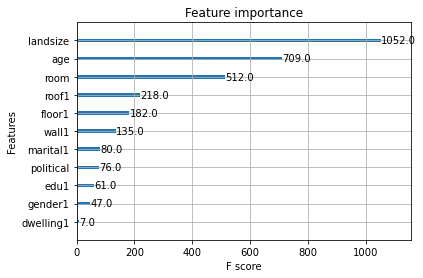

In [103]:
xgb.plot_importance(xgb_cl)


In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2077
           1       0.50      0.29      0.37       550

    accuracy                           0.79      2627
   macro avg       0.67      0.61      0.62      2627
weighted avg       0.76      0.79      0.77      2627



In [105]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
clf_preds = clf.predict(X_test)
accuracy_score(y_test, clf_preds)


0.6615911686334222

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfr = RandomForestClassifier(max_depth=7, random_state=0)
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)
accuracy_score(y_test, rfr_preds)

0.8039588884659307

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
lg_preds = logreg.predict(X_test)
accuracy_score(y_test, lg_preds)

0.7974876284735439

# new features to predict next poor: using poor status in previous year

In [109]:
X = feats.drop(columns=['total', 'next_total', 'next_poor'])
y = feats['next_poor']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=711, test_size=0.2)

In [110]:
rfr = RandomForestClassifier(max_depth=7, random_state=0)
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)
accuracy_score(y_test, rfr_preds)

0.827940616673011

In [111]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
lg_preds = logreg.predict(X_test)
accuracy_score(y_test, lg_preds)

C:\Users\huyen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8111914731633042

In [112]:
clf = ComplementNB()
clf.fit(X_train, y_train)
clf_preds = clf.predict(X_test)
accuracy_score(y_test, clf_preds)

0.6650171298058623

In [113]:
xgb_cl = xgb.XGBClassifier(**params)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds)

0.8134754472782642

# Output: Income

C:\Users\huyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 97304.43 and sigma = 201522.78



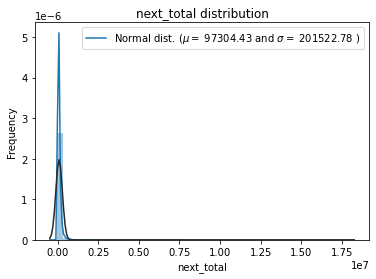

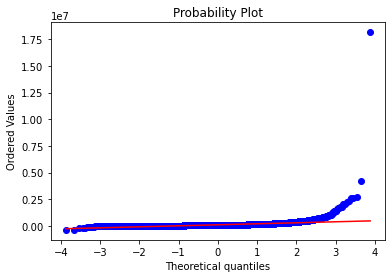

In [114]:
from scipy.stats import norm
from scipy import stats
sns.distplot(feats['next_total'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(feats['next_total'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('next_total distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(feats['next_total'], plot=plt)
plt.show()

In [115]:
feats2 = feats[feats['next_total']>=0]

C:\Users\huyen\AppData\Local\Temp\ipykernel_15728\3596052710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats2["next_total"] = np.log1p(feats2["next_total"])
C:\Users\huyen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 1.25 and sigma = 0.02



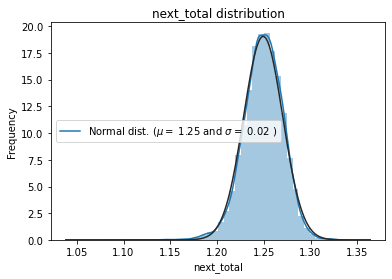

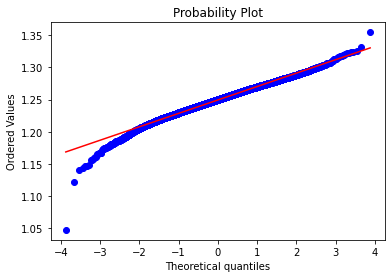

In [118]:
# Log-transformation of the target variable
import numpy as np
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
feats2["next_total"] = np.log1p(feats2["next_total"])

#Check the new distribution 
sns.distplot(feats2['next_total'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(feats2['next_total'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('next_total distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(feats2['next_total'], plot=plt)
plt.show()

In [119]:
X = feats2.drop(columns=['total', 'next_total', 'next_poor', 'poor1'])
y = feats2['next_total']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=711, test_size=0.2)

In [120]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']

models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    mdl = model
    mdl.fit(X_train, y_train)
    mdl_preds = mdl.predict(X_test)
    print(f"{name} : {r2_score(y_test, mdl_preds)}")

Linear Regression : 0.2149488131040197
Ridge Regression : 0.21495758885528926
Lasso Regression : 0.02978589791779407
K Neighbors Regressor : 0.04762420000349987
Decision Tree Regressor : -0.45267179587138795
Random Forest Regressor : 0.2487273116587061
Gradient Boosting Regressor : 0.27920375168001177
Adaboost Regressor : 0.0039343850894544286


In [121]:
X = feats2.drop(columns=['next_total', 'next_poor', 'poor1'])
y = feats2['next_total']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=711, test_size=0.2)

In [122]:
#Running all algorithms
for name, model in zip(names, models):
    mdl = model
    mdl.fit(X_train, y_train)
    mdl_preds = mdl.predict(X_test)
    print(f"{name} : {r2_score(y_test, mdl_preds)}")

Linear Regression : 0.2768535014491952
Ridge Regression : 0.27686198421372
Lasso Regression : 0.17728411014592005
K Neighbors Regressor : 0.24884073707011822
Decision Tree Regressor : -0.24026318847571315
Random Forest Regressor : 0.36828409747570257
Gradient Boosting Regressor : 0.3986045016518478
Adaboost Regressor : 0.2407036859598215
